# Лабораторна робота №2

## Завантаження бібліотек

In [49]:
import sys
!{sys.executable} -m pip install pandas matplotlib seaborn sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=f7cfc4d936430a95ec6f4d6ef71697fac1e65a64facef7e322cc677b01ea4522
  Stored in directory: /Users/ilya/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


## Імпорт бібліотек

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model

## Отримання даних
Використав дані з 

In [97]:
data = pd.read_csv('kc_house_data.csv', index_col='id').drop(['date', 'yr_built', 'yr_renovated', 'zipcode'], axis=1)

## Вивід інформаії про датасет

In [76]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000


## Кореляційна матриця R^2

In [98]:
corr_matrix = data.corr() ** 2
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.095079,0.275769,0.492853,0.008039,0.065943,0.070953,0.157842,0.001322,0.445468,3.667118e-01,0.104857,9.425114e-02,0.000468,0.342668,0.006798
bedrooms,0.095079,1.000000,0.266136,0.332549,0.001005,0.030775,0.000043,0.006325,0.000811,0.127425,2.281019e-01,0.091866,7.976293e-05,0.016763,0.153380,0.000855
bathrooms,0.275769,0.266136,1.000000,0.569520,0.007698,0.250654,0.004063,0.035245,0.015620,0.442202,4.696943e-01,0.080525,6.038300e-04,0.049748,0.323345,0.007600
sqft_living,0.492853,0.332549,0.569520,1.000000,0.029869,0.125280,0.010778,0.081004,0.003452,0.581718,7.684216e-01,0.189262,2.759344e-03,0.057707,0.572172,0.033594
sqft_lot,0.008039,0.001005,0.007698,0.029869,1.000000,0.000027,0.000467,0.005582,0.000080,0.012910,3.367676e-02,0.000234,7.341540e-03,0.052680,0.020912,0.516324
floors,0.065943,0.030775,0.250654,0.125280,0.000027,1.000000,0.000562,0.000867,0.069574,0.209931,2.744552e-01,0.060371,2.461562e-03,0.015730,0.078336,0.000127
waterfront,0.070953,0.000043,0.004063,0.010778,0.000467,0.000562,1.000000,0.161489,0.000277,0.006852,5.194747e-03,0.006494,2.037407e-04,0.001756,0.007476,0.000943
view,0.157842,0.006325,0.035245,0.081004,0.005582,0.000867,0.161489,1.000000,0.002115,0.063162,2.810630e-02,0.076699,3.790535e-05,0.006147,0.078646,0.005267
condition,0.001322,0.000811,0.015620,0.003452,0.000080,0.069574,0.000277,0.002115,1.000000,0.020930,2.503155e-02,0.030313,2.232337e-04,0.011342,0.008616,0.000012
grade,0.445468,0.127425,0.442202,0.581718,0.012910,0.209931,0.006852,0.063162,0.020930,1.000000,5.714195e-01,0.028356,1.301517e-02,0.039352,0.508657,0.014220


## Візуалізація кореляційної матриці R^2

<AxesSubplot:>

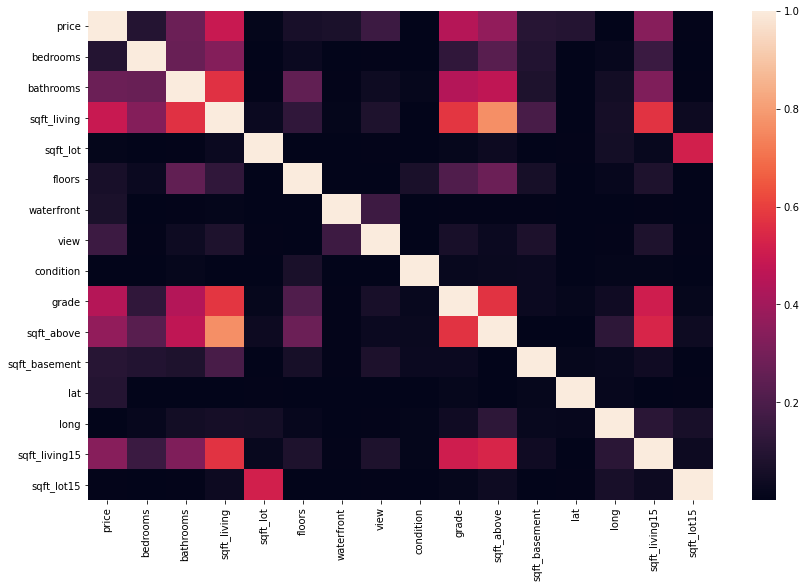

In [99]:
plt.figure(figsize=(14, 9))
sns.heatmap(data=corr_matrix)

## Визначення кращих змінних (5 штук)

In [100]:
corr_zipped = zip(corr_matrix['price'] ** 2, corr_matrix.columns)
best = sorted(corr_zipped, key=lambda z: -z[0])[1:6]
best_columns = [el[1] for el in best]

print(f'Найкращі змінні: {best_columns}')

data = data[best_columns + ['price']]

Найкращі змінні: ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']


## Візуалізація R^2 матриці лише з кращими змінними

<AxesSubplot:>

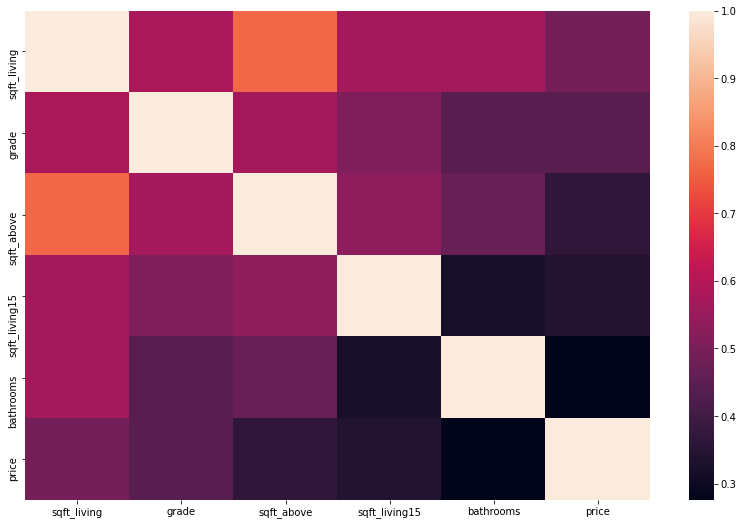

In [6]:
plt.figure(figsize=(14, 9))
sns.heatmap(data=data.corr() ** 2)

## Візуалізація (розподіли на діагоналі, залежності величин на інших клітинках)

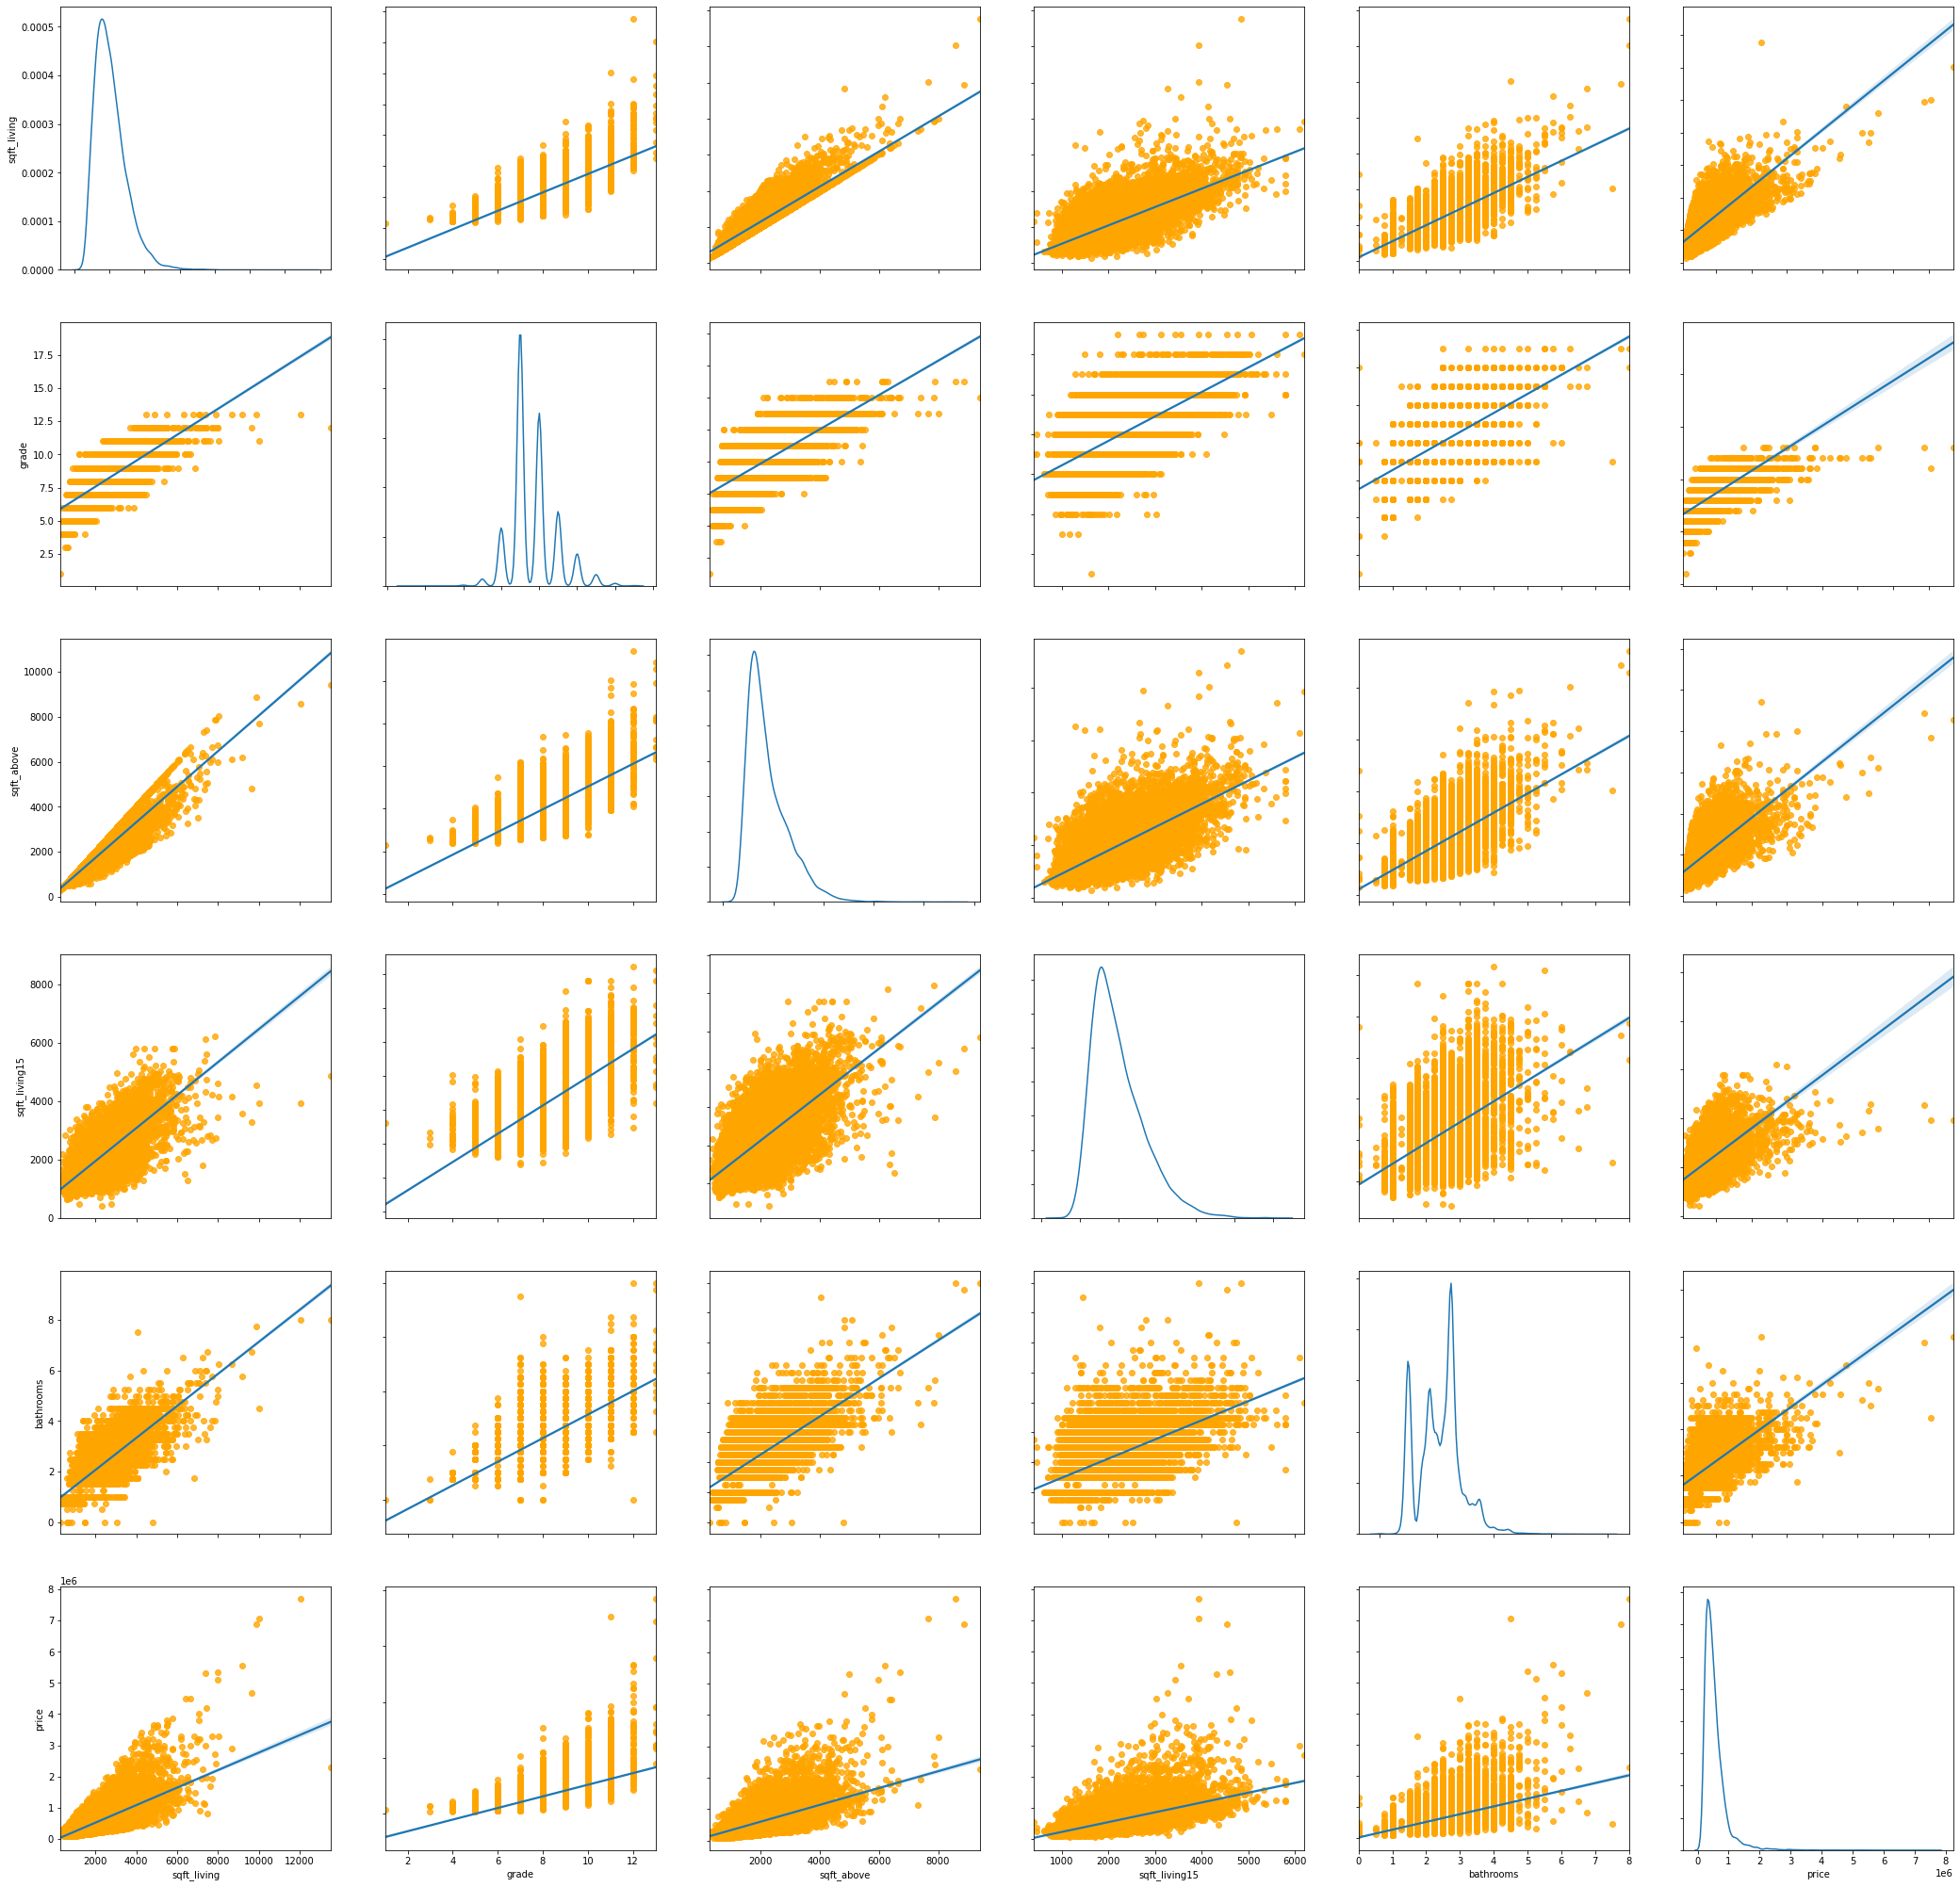

In [149]:
figure_len = len(data.columns)
fig, axes = plt.subplots(figure_len, figure_len, figsize=(36, 36))

cols = data.columns

for col in range(figure_len):
    for row in range(figure_len):
        if col == row:
            sns.kdeplot(data[data.columns[col]], ax=axes[col, row])
        else:
            sns.regplot(x=data[data.columns[col]], y=data[data.columns[row]], ax=axes[row, col],
                        scatter_kws={'color': 'orange'})
            

for index, ax in enumerate(axes.flat):
    ax.set(xlabel=cols[index % 6], ylabel=cols[index // 6])

for ax in axes.flat:
    ax.label_outer()

## Побудова лінійної моделі з усіма змінними

In [122]:
Y = data['price']
X = data.drop(['price'], axis=1)

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print(f'price = {regr.intercept_:.3f}', end='')
for index, coef in enumerate(regr.coef_):
    print(f' {"+" if coef > 0 else "-"} {abs(coef):.3f} * {data.columns[index]}', end='')
print(' + ε')

price = -646863.747 + 245.421 * sqft_living + 111024.920 * grade - 80.485 * sqft_above + 22.820 * sqft_living15 - 35464.023 * bathrooms + ε


In [123]:
squared_error = sum((Y - regr.predict(X)) ** 2)
mean_squared_error = squared_error / X.size
print(f'Mean Squared Error: {mean_squared_error:,.0f}')

Mean Squared Error: 12,285,658,966


## Побудова лінійних моделей для кожної окремо взятої змінної

In [124]:
for col in X:
    regr = linear_model.LinearRegression()
    temp_x = pd.DataFrame(X[col])
    regr.fit(temp_x, Y)
    squared_error = sum((Y - regr.predict(temp_x)) ** 2)
    mean_squared_error = squared_error / X.size
    
    print(f'\t{col.upper()}')
    print(f'price = {regr.intercept_:.3f} {"+" if regr.coef_[0] > 0 else "-"} {abs(regr.coef_[0]):.3f} * {col}')
    print(f'Mean Squared Error (for {col} only): {mean_squared_error:,.0f}')
    print('=' * 80)

	SQFT_LIVING
price = -43580.743 + 280.624 * sqft_living
Mean Squared Error (for sqft_living only): 13,670,257,367
	GRADE
price = -1056044.977 + 208457.562 * grade
Mean Squared Error (for grade only): 14,947,523,637
	SQFT_ABOVE
price = 59953.192 + 268.473 * sqft_above
Mean Squared Error (for sqft_above only): 17,070,429,374
	SQFT_LIVING15
price = -82807.195 + 313.556 * sqft_living15
Mean Squared Error (for sqft_living15 only): 17,718,521,805
	BATHROOMS
price = 10708.309 + 250326.516 * bathrooms
Mean Squared Error (for bathrooms only): 19,521,801,281


## Висновки
### Згідно з метрики Mean Squared Error (далі MSE), найкраще працює модель з усіма змінними (MSE менша). Це очевидно, оскільки всі обрані змінні так чи інакша корелюють з Y